In [1]:
from qiskit import pulse

with pulse.build(name='my_example') as my_program:
    # Add instructions here
    pass

my_program

ScheduleBlock(, name="my_example", transform=AlignLeft())

In [2]:
from qiskit.pulse import DriveChannel

channel = DriveChannel(0)

In [3]:
from qiskit.providers.fake_provider import FakeValencia

backend = FakeValencia()

with pulse.build(backend=backend, name='backend_aware') as backend_aware_program:
    channel = pulse.drive_channel(0)
    print(pulse.num_qubits())
    # Raises an error as backend only has 5 qubits
    #pulse.drive_channel(100)

5


In [4]:
with pulse.build(backend) as delay_5dt:
    pulse.delay(5, channel)

In [5]:
from qiskit.pulse import library

amp = 1
sigma = 10
num_samples = 128

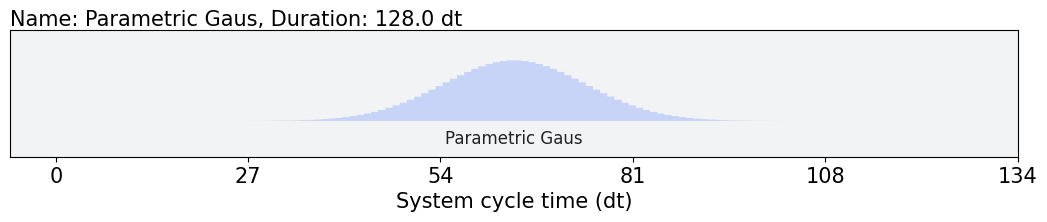

In [6]:
gaus = pulse.library.Gaussian(num_samples, amp, sigma,
                              name="Parametric Gaus")
gaus.draw()

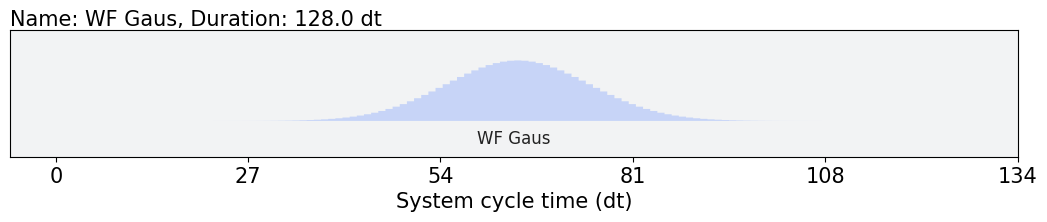

In [7]:
import numpy as np

times = np.arange(num_samples)
gaussian_samples = np.exp(-1/2 *((times - num_samples / 2) ** 2 / sigma**2))

gaus = library.Waveform(gaussian_samples, name="WF Gaus")
gaus.draw()

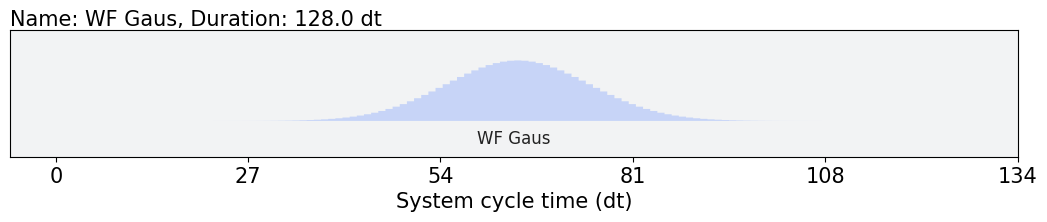

In [8]:
import numpy as np

times = np.arange(num_samples)
gaussian_samples = np.exp(-1/2 *((times - num_samples / 2) ** 2 / sigma**2))

gaus = library.Waveform(gaussian_samples, name="WF Gaus")
gaus.draw()

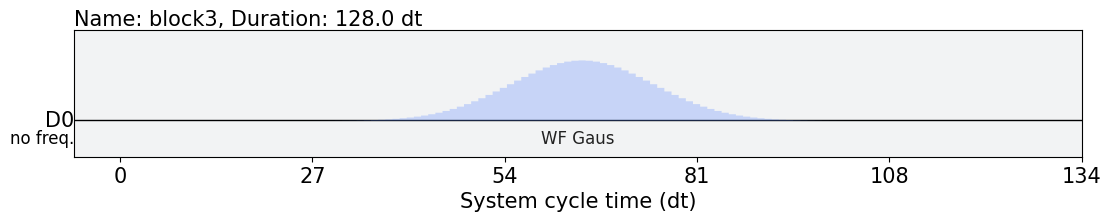

In [9]:
with pulse.build() as schedule:
    pulse.play(gaus, channel)
schedule.draw()

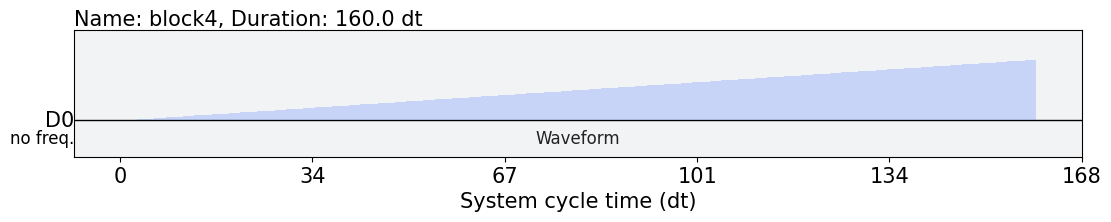

In [10]:
with pulse.build() as schedule:
    pulse.play([0.001*i for i in range(160)], channel)
schedule.draw()

In [11]:
with pulse.build(backend) as schedule:
    pulse.set_frequency(4.5e9, channel)

In [12]:
with pulse.build(backend) as schedule:
    pulse.shift_phase(np.pi, channel)

In [13]:
from qiskit.pulse import Acquire, AcquireChannel, MemorySlot

with pulse.build(backend) as schedule:
    pulse.acquire(1200, pulse.acquire_channel(0), MemorySlot(0))

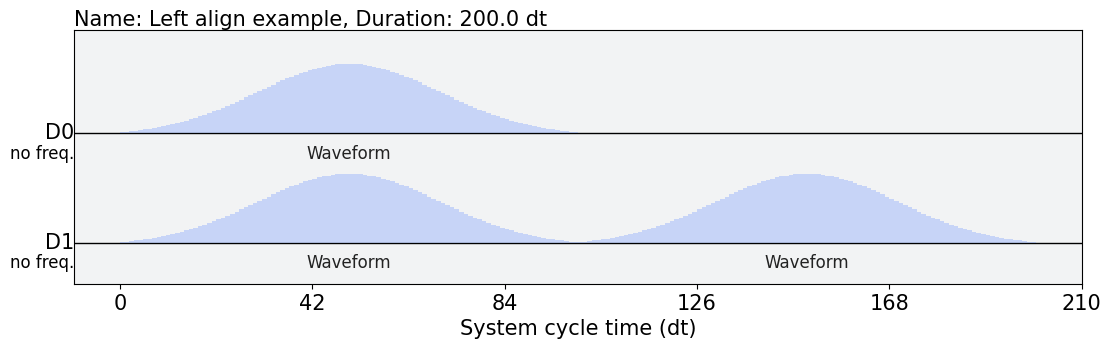

In [14]:
with pulse.build(backend, name='Left align example') as program:
    with pulse.align_left():
        gaussian_pulse = library.gaussian(100, 0.5, 20)
        pulse.play(gaussian_pulse, pulse.drive_channel(0))
        pulse.play(gaussian_pulse, pulse.drive_channel(1))
        pulse.play(gaussian_pulse, pulse.drive_channel(1))

program.draw()

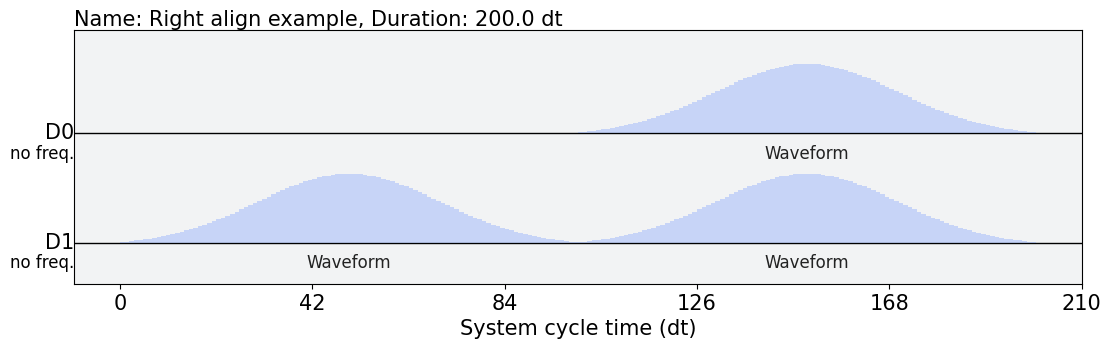

In [15]:
with pulse.build(backend, name='Right align example') as program:
    with pulse.align_right():
        gaussian_pulse = library.gaussian(100, 0.5, 20)
        pulse.play(gaussian_pulse, pulse.drive_channel(0))
        pulse.play(gaussian_pulse, pulse.drive_channel(1))
        pulse.play(gaussian_pulse, pulse.drive_channel(1))

program.draw()

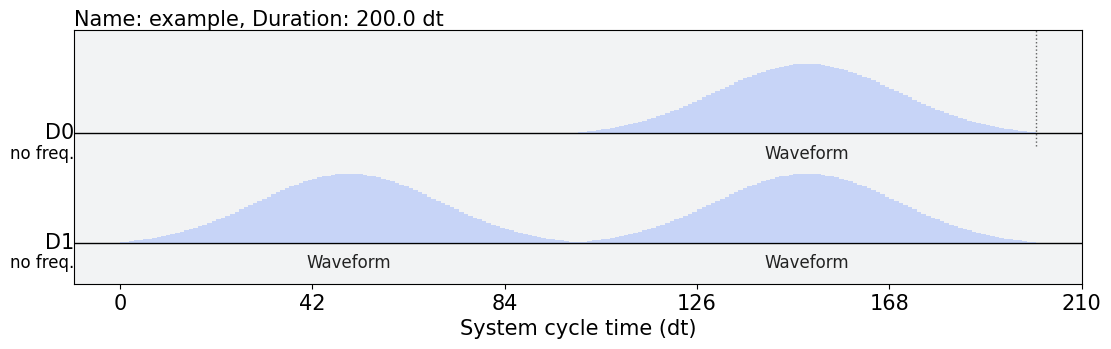

In [16]:
with pulse.build(backend, name='example') as program:
    gaussian_pulse = library.gaussian(100, 0.5, 20)
    with pulse.align_equispaced(2*gaussian_pulse.duration):
        pulse.play(gaussian_pulse, pulse.drive_channel(0))
    pulse.play(gaussian_pulse, pulse.drive_channel(1))
    pulse.play(gaussian_pulse, pulse.drive_channel(1))

program.draw()

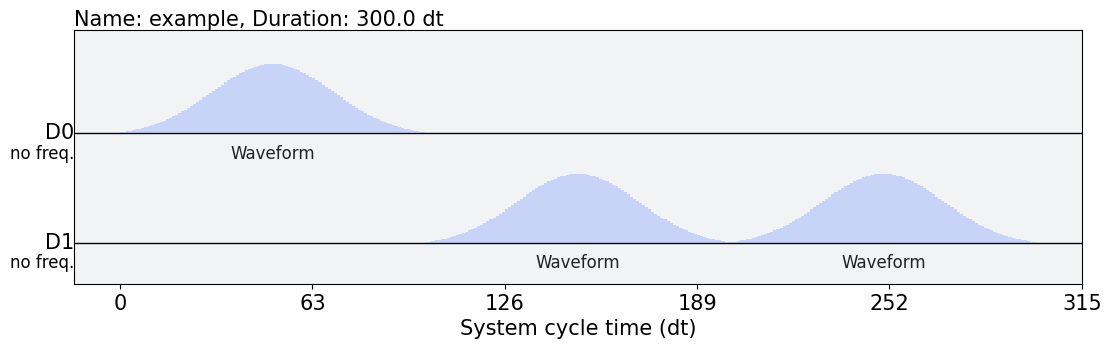

In [17]:
with pulse.build(backend, name='example') as program:
    with pulse.align_sequential():
        gaussian_pulse = library.gaussian(100, 0.5, 20)
        pulse.play(gaussian_pulse, pulse.drive_channel(0))
        pulse.play(gaussian_pulse, pulse.drive_channel(1))
        pulse.play(gaussian_pulse, pulse.drive_channel(1))

program.draw()

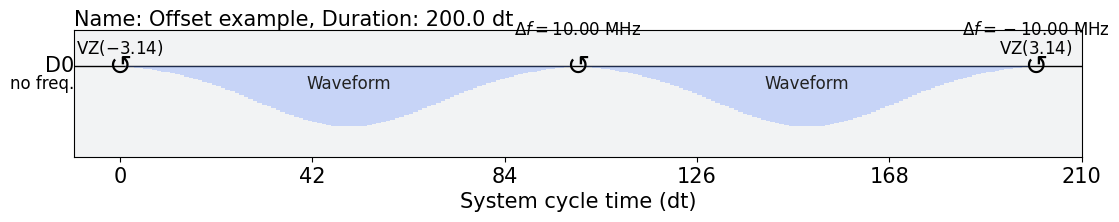

In [18]:
with pulse.build(backend, name='Offset example') as program:
    with pulse.phase_offset(3.14, pulse.drive_channel(0)):
        pulse.play(gaussian_pulse, pulse.drive_channel(0))
        with pulse.frequency_offset(10e6, pulse.drive_channel(0)):
            pulse.play(gaussian_pulse, pulse.drive_channel(0))

program.draw()

In [19]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright